<a href="https://colab.research.google.com/github/kavusikankg/machine-learning/blob/main/Gini_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("/content/Sleep_Efficiency.csv")

In [3]:
col = list(df.columns)

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for m in col:
  df[m]=labelencoder.fit_transform(df[m])
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,0,56,0,76,77,2,38,1,26,3,0,0,0,1,3
1,1,60,1,69,69,3,16,2,7,23,3,0,3,1,3
2,2,31,0,327,334,5,39,3,26,1,1,0,0,0,3
3,3,31,0,38,37,2,1,6,5,22,3,2,5,1,1
4,4,48,1,181,183,5,26,10,16,9,3,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,447,18,0,188,190,4,41,5,18,12,0,0,0,0,5
448,448,43,1,414,423,2,24,11,18,6,4,1,0,0,3
449,449,31,0,105,104,6,5,3,9,19,1,6,3,1,0
450,450,36,1,390,398,3,26,1,27,1,3,0,0,0,3


In [5]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,0,56,0,76,77,2,38,1,26,3,0,0,0,1,3
1,1,60,1,69,69,3,16,2,7,23,3,0,3,1,3
2,2,31,0,327,334,5,39,3,26,1,1,0,0,0,3
3,3,31,0,38,37,2,1,6,5,22,3,2,5,1,1
4,4,48,1,181,183,5,26,10,16,9,3,0,3,0,3


In [6]:
df.tail()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,447,18,0,188,190,4,41,5,18,12,0,0,0,0,5
448,448,43,1,414,423,2,24,11,18,6,4,1,0,0,3
449,449,31,0,105,104,6,5,3,9,19,1,6,3,1,0
450,450,36,1,390,398,3,26,1,27,1,3,0,0,0,3
451,451,9,1,220,224,4,13,5,3,25,1,2,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID                      452 non-null    int64
 1   Age                     452 non-null    int64
 2   Gender                  452 non-null    int64
 3   Bedtime                 452 non-null    int64
 4   Wakeup time             452 non-null    int64
 5   Sleep duration          452 non-null    int64
 6   Sleep efficiency        452 non-null    int64
 7   REM sleep percentage    452 non-null    int64
 8   Deep sleep percentage   452 non-null    int64
 9   Light sleep percentage  452 non-null    int64
 10  Awakenings              452 non-null    int64
 11  Caffeine consumption    452 non-null    int64
 12  Alcohol consumption     452 non-null    int64
 13  Smoking status          452 non-null    int64
 14  Exercise frequency      452 non-null    int64
dtypes: int64(15)
memory usa

In [8]:
df.shape

(452, 15)

In [9]:
df.describe()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,225.500000,31.285398,0.504425,212.769912,216.926991,4.013274,28.891593,5.661504,17.250000,10.402655,1.789823,1.199115,1.323009,0.340708,1.847345
std,130.625419,13.172250,0.500534,121.729609,125.352157,1.505290,13.523707,3.375669,7.503547,6.834554,1.495769,1.560374,1.802216,0.474472,1.498312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.750000,20.000000,0.000000,108.750000,109.750000,3.000000,19.750000,3.000000,12.750000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,225.500000,31.000000,1.000000,212.500000,216.500000,4.000000,32.000000,5.000000,19.000000,9.000000,1.000000,1.000000,0.000000,0.000000,2.000000
75%,338.250000,43.000000,1.000000,318.250000,326.250000,5.000000,40.000000,8.000000,23.000000,14.250000,3.000000,2.000000,3.000000,1.000000,3.000000
max,451.000000,60.000000,1.000000,423.000000,433.000000,8.000000,49.000000,12.000000,28.000000,28.000000,5.000000,6.000000,6.000000,1.000000,6.000000


In [10]:
df.nunique()

ID                        452
Age                        61
Gender                      2
Bedtime                   424
Wakeup time               434
Sleep duration              9
Sleep efficiency           50
REM sleep percentage       13
Deep sleep percentage      29
Light sleep percentage     29
Awakenings                  6
Caffeine consumption        7
Alcohol consumption         7
Smoking status              2
Exercise frequency          7
dtype: int64

In [11]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [12]:
df.isnull()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


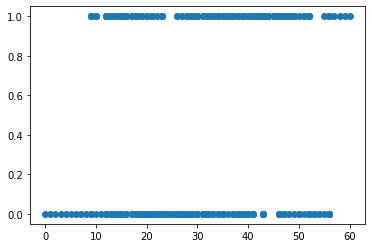

In [13]:
plt.scatter(df.Age,df.Gender)
plt.show()

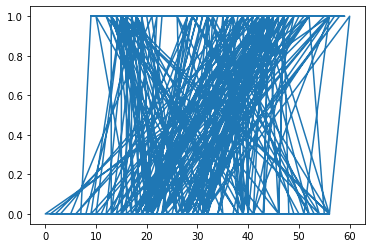

In [14]:
plt.plot(df.Age,df.Gender)
plt.show()

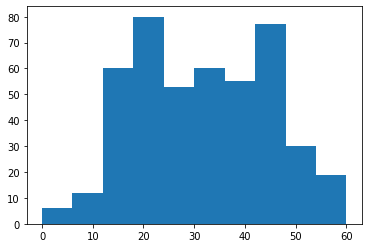

In [17]:
plt.hist(df.Age)
plt.show()

In [18]:
x=df.drop('Exercise frequency',axis=1)
y=df['Exercise frequency']

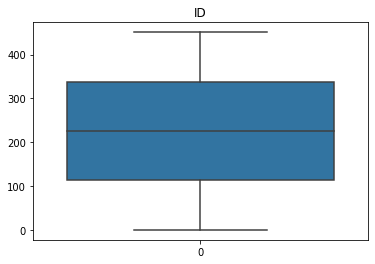

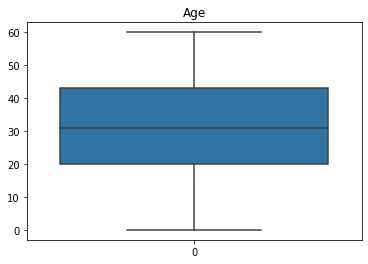

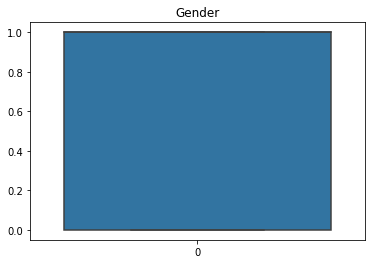

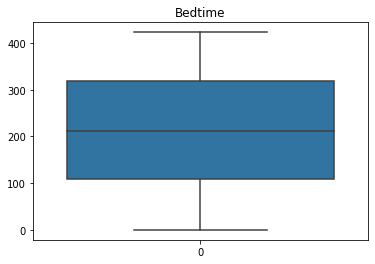

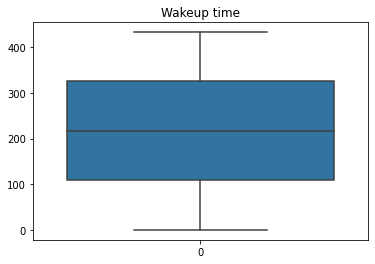

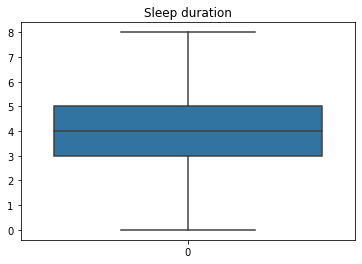

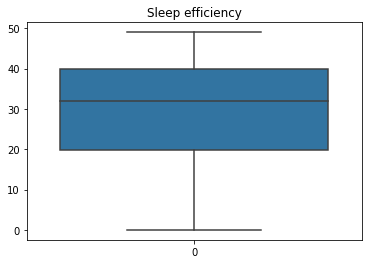

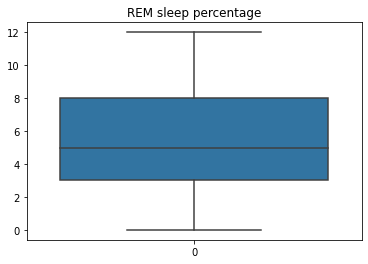

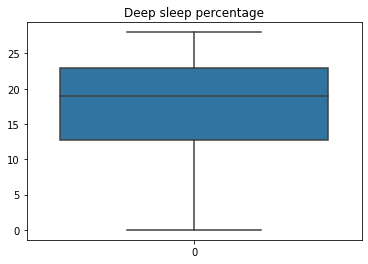

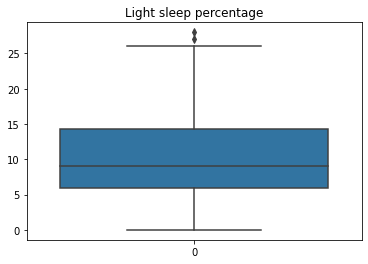

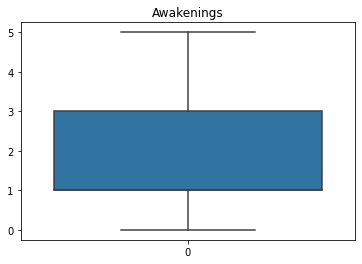

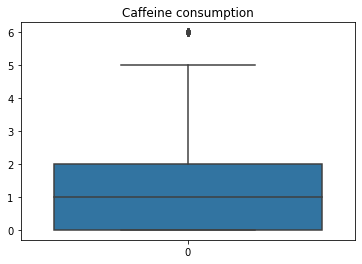

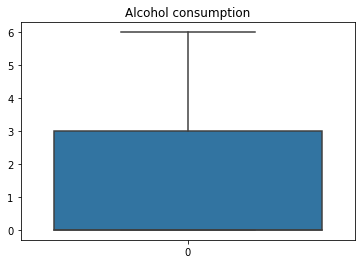

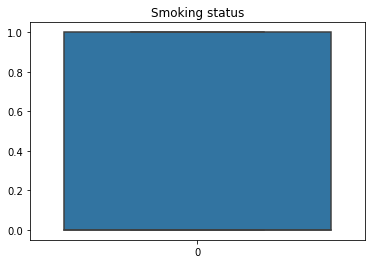

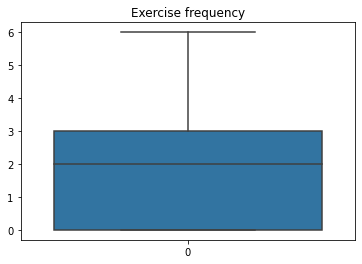

In [19]:
for j in col:
  sns.boxplot(df[j])
  plt.title(j)
  plt.show()


In [20]:
x.head(3)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status
0,0,56,0,76,77,2,38,1,26,3,0,0,0,1
1,1,60,1,69,69,3,16,2,7,23,3,0,3,1
2,2,31,0,327,334,5,39,3,26,1,1,0,0,0


In [21]:
y.head(3)

0    3
1    3
2    3
Name: Exercise frequency, dtype: int64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [23]:
a=StandardScaler()
x_train=a.fit_transform(x_train)
x_test=a.transform(x_test)

In [24]:
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
y_pred=clf.predict(x_test)

In [26]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[40,  0,  1,  5,  1,  3,  0],
       [ 8, 31,  2,  6,  1,  3,  0],
       [ 9,  3,  7,  7,  2,  1,  2],
       [ 6,  9,  1, 44,  7,  1,  1],
       [ 2,  3,  2,  3,  7,  0,  2],
       [ 0,  1,  0,  0,  2,  1,  0],
       [ 1,  0,  0,  1,  0,  0,  0]])

In [27]:
import sklearn

In [28]:
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test,y_pred)

0.5752212389380531

In [29]:
import graphviz

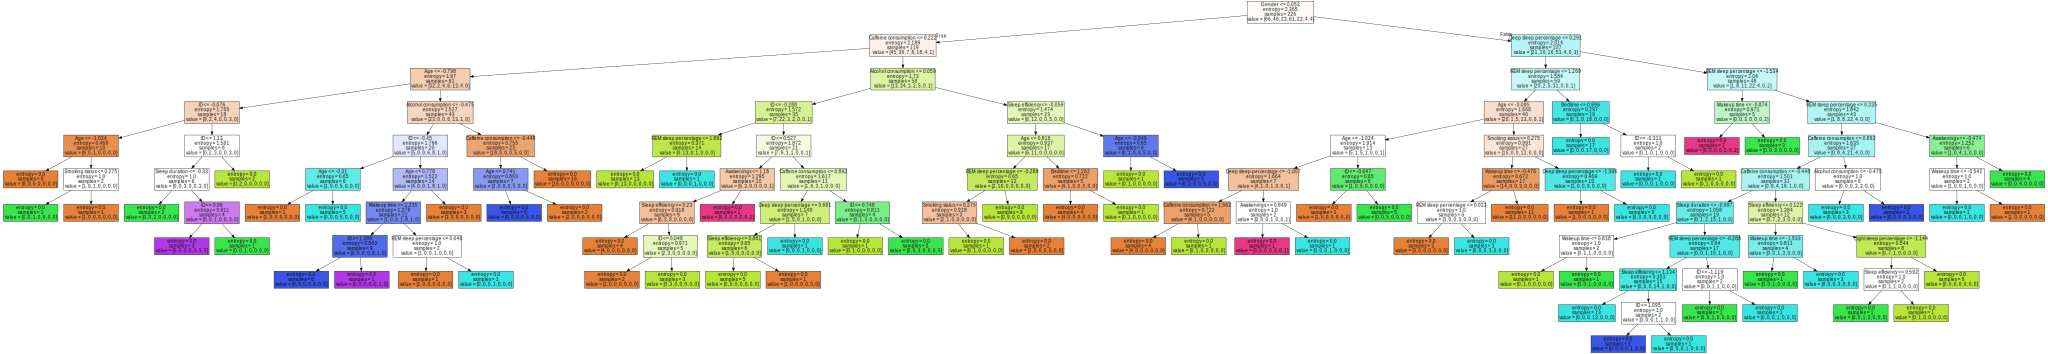

In [30]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True,))